# Lista 1

## Questão 2

# Funções de Bessel

Temos que a função de Bessel de primeira espécie é definida como sendo: <br>

$J_{p}(x) = \sum_{n=1}^{\infty} \frac{(-1)^n}{n! (n+p)!} (\frac{x}{2})^{2n+p}$

Temos que as derivadas de primeira e segunda ordem da função de Bessel $J_1$ são descritas como: <br>
$\frac{d(J_{1})}{dx} = J_{0}(x) - \frac{1}{x}J_{1}(x)$

$\frac{d^2(J_{1})}{dx^2} = J_{1}(x)(\frac{2}{x^2}-1) - J_{0}(x)(\frac{1}{x})$

# Aproximações das derivadas através de diferenças finitas

$i)$ A proximação central com 3 pontos: <br>

$\left.\frac{d(J_{1}(x))}{dx}\right|_{x=x_i} = \frac{J_{1}(i+1) - J_{1}(i-1)}{2\Delta x} $

$\left.\frac{d^2(J_{1}(x))}{dx^2}\right|_{x=x_i} = \frac{J_{1}(i-1) - 2J_{1}(i) + J_{1}(i+1)}{\Delta x^2} $

$ii)$ A proximação Forward com 3 pontos: <br>

$\left.\frac{d(J_{1}(x))}{dx}\right|_{x=x_i} = \frac{-3J_{1}(i) + 4J_{1}(i+1) - J_{1}(i+2)}{2\Delta x} $

$\left.\frac{d^2(J_{1}(x))}{dx^2}\right|_{x=x_i} = \frac{J_{1}(i) - 2J_{1}(i+1) + J_{1}(i+2)}{\Delta x^2} $

$iii)$ A proximação central com 5 pontos: <br>

$\left.\frac{d(J_{1}(x))}{dx}\right|_{x=x_i} = \frac{J_{1}(i+2) - J_{1}(i-2)}{4\Delta x} $

$\left.\frac{d^2(J_{1}(x))}{dx^2}\right|_{x=x_i} = \frac{J_{1}(i+2) + J_{1}(i-2) - 2J_{1}(i)}{4\Delta x^2} $

$vi)$ A proximação backward com 3 pontos: <br>

$\left.\frac{d(J_{1}(x))}{dx}\right|_{x=x_i} = \frac{-4J_{1}(i-1) + 3J_{1}(i) + J_{1}(i-2)}{2\Delta x} $

$\left.\frac{d^2(J_{1}(x))}{dx^2}\right|_{x=x_i} = \frac{-2J_{1}(i-1) + J_{1}(i) + J_{1}(i-2)}{\Delta x^2} $




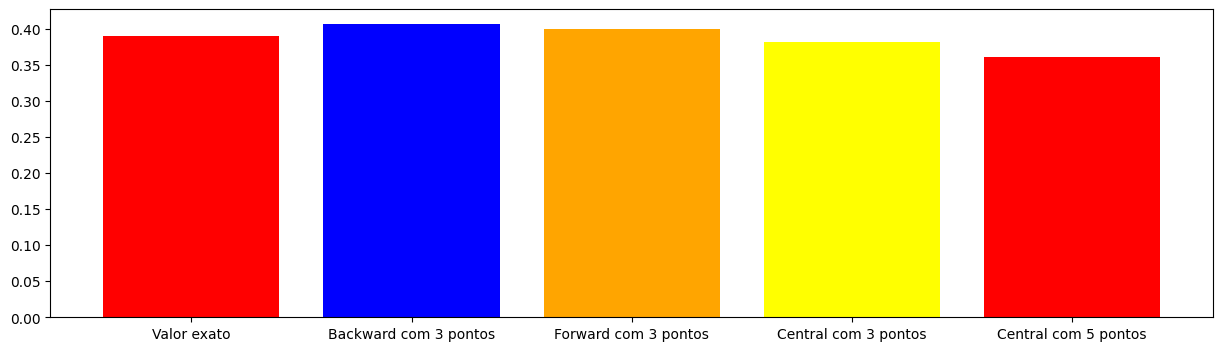

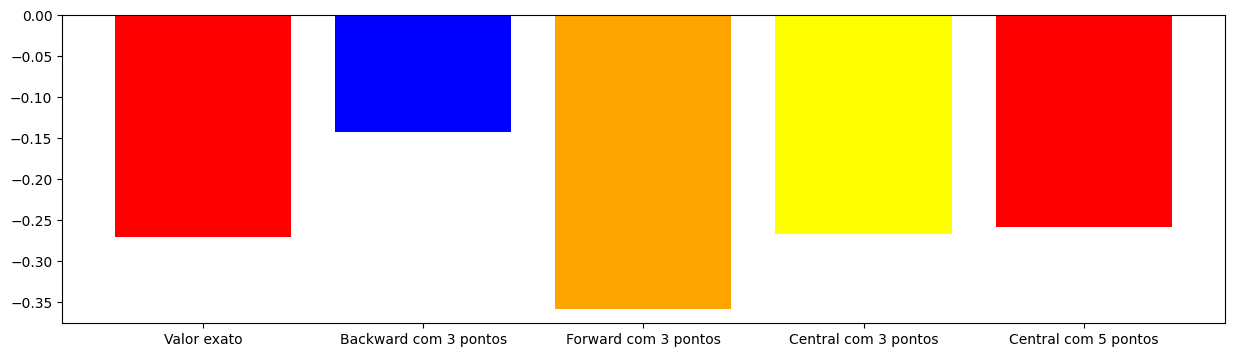

In [ ]:
import scipy as sp
import math as mt
import matplotlib.pyplot as plt

# Função de Bessel
def J (p, x):
    return sp.special.jv(p, x)

# Ponto de interesse
x = mt.pi / 4
delta_x = mt.pi / 4

# Valores exatos das derivadas da função J1 no ponto x = pi/4
# Primeira derivada
dj_dx_ex = J(0,x) - ((1 / x) * J(1,x))

# Segunda Derivada
dj2_dx2_ex = (J(1,x) * ((2/(x ** 2)) - 1)) - ((1/x) * J(0,x))

# a) Aproximação Backward com 3 pontos
dj_dx_b = ((-4 * J(1,(x - (delta_x/2)))) + (3 * J(1,x)) + J(1, (x - delta_x))) / (2 * (delta_x / 2))
dj2_dx2_b = ((-2 * J(1,(x - (delta_x/2)))) + (1 * J(1,x)) + J(1, (x - delta_x))) / ((delta_x / 2) ** 2)

# b) Aproximação Forward com 3 pontos
dj_dx_f = ((-3 * J(1,x)) + (4 * J(1,(x + (delta_x / 2)))) - J(1, (x + delta_x))) / (2 * (delta_x / 2))
dj2_dx2_f = ((1 * J(1,x)) - (2 * J(1, (x + (delta_x / 2)))) + J(1, (x + delta_x))) / ((delta_x / 2) ** 2)

# c) Aproximação Central com 3 pontos
dj_dx_c3 = ((1 * J(1,(x + (delta_x / 2)))) - J(1, (x - (delta_x / 2)))) / (2 * (delta_x / 2))
dj2_dx2_c3 = ((1 * J(1, x - (delta_x / 2))) - (2 * J(1, x)) + J(1, (x + (delta_x / 2)))) / ((delta_x / 2) ** 2)

# d) Aproximação Central com 5 pontos
dj_dx_c5 = ((1 * J(1,(x + delta_x))) - J(1, (x - delta_x))) / (4 * (delta_x / 2))
dj2_dx2_c5 = ((1 * J(1, (x + delta_x))) + (1 * J(1, (x - delta_x))) - ( 2 * J(1, x))) / (4 * ((delta_x / 2) ** 2))

# Apresentação dos resultados
#Primeira derivada
fig, ax = plt.subplots(figsize = (15,4))
fig, bx = plt.subplots(figsize = (15,4))

abordagens = ['Valor exato', 'Backward com 3 pontos', 'Forward com 3 pontos', 'Central com 3 pontos', 'Central com 5 pontos']
resultados_1 = [dj_dx_ex, dj_dx_b, dj_dx_f, dj_dx_c3, dj_dx_c5]
resultados_2 = [dj2_dx2_ex, dj2_dx2_b, dj2_dx2_f, dj2_dx2_c3, dj2_dx2_c5]
bar_colors = ['red', 'blue', 'orange', 'yellow'] 

ax.bar(abordagens, resultados_1, label = abordagens , color = bar_colors)
bx.bar(abordagens, resultados_2, label = abordagens , color = bar_colors)
plt.show()


# Questão 3

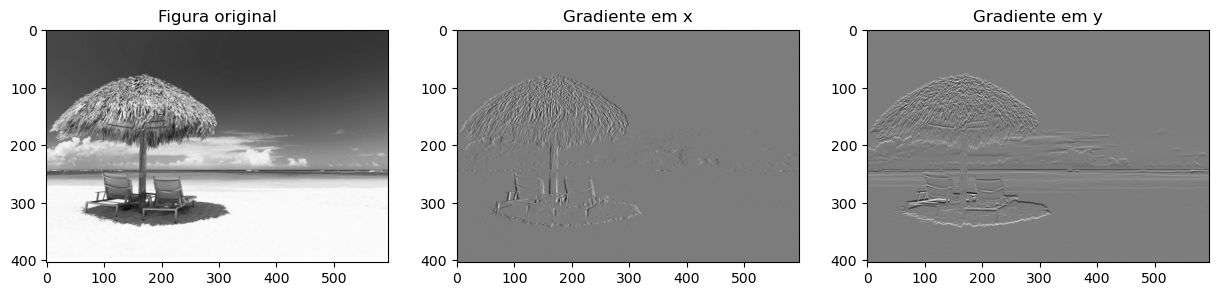

In [59]:
import skimage as si
import numpy as np
import matplotlib.pyplot as plt

#Importa a imagem
original_fig = si.io.imread("Figure_lista.png", as_gray=True)
M = np.asarray(original_fig)
altura = M.shape[0]
largura = M.shape[1]

#Matrizes dos gradientes
grad_x = np.zeros_like(M, dtype=float)
grad_y = np.zeros_like(M, dtype=float)

# Aproximação da primeira derivada
def df (x_f, x_b ):
    delta_fig = 1
    return (x_f - x_b) / (2 * delta_fig)

# Calculo do gradiente em x
for i in range(0,(M.shape[0])):
    for j in range (1, (M.shape[1]-1)):
         deriv_x = df(M[i,(j+1)], M[i,(j-1)]) 
         grad_x[i,j] = deriv_x

# Calculo do gradiente em y
for j in range(0,(M.shape[1])):
    for i in range (1, (M.shape[0]-1)):
         deriv_y = df(M[(i+1),j], M[(i-1),j]) 
         grad_y[i,j] = deriv_y

# Plotagem
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(original_fig, cmap='gray')
ax[0].set_title('Figura original')
ax[1].imshow(grad_x, cmap='gray')
ax[1].set_title('Gradiente em x')
ax[2].imshow(grad_y, cmap='gray')
ax[2].set_title('Gradiente em y')

plt.show()


# Questão 4

Melhor N_x, N_y: 49, Diferenca: 0.003984543737538759


"''\n    # Plot da discretização\n    plt.plot(x, y, marker='o', color='k', linestyle='none')\n    plt.xlabel('x')\n    plt.ylabel('y')\n    plt.show()\n\n    plt.plot(x[region_B], y[region_B], 'sb', label = 'B')\n    plt.plot(x[region_R], y[region_R], 'sr', label = 'R')\n    plt.plot(x[region_T], y[region_T], 'sg', label = 'T')\n    plt.plot(x[region_L], y[region_L], 'sm', label = 'L')\n    plt.plot(x[n_inf_l], y[n_inf_l], 'sc', label = 'B')\n    plt.plot(x[n_inf_r], y[n_inf_r], 'sy', label = 'R')\n    plt.plot(x[n_t_r], y[n_t_r], 'sc', label = 'T')\n    plt.plot(x[n_t_l], y[n_t_l], 'sy', label = 'L')\n\n    plt.plot(x, y, '.k')\n\n    # Resultado\n    plt.figure()\n    plt.pcolor(T_matrix)\n    plt.colorbar()\n    a = int((N_x - 1) / 2)\n    T_matrix[0, a]\n    "

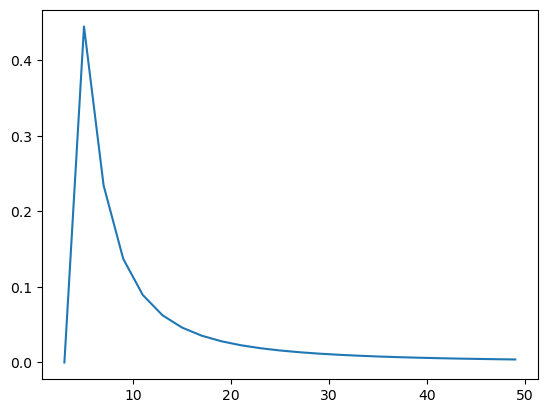

In [ ]:
#Caso bi-dimensional estático
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada
L_x = 1 #m
L_y = 1 #m
k = 0.3 # (W/(m.K)), condutividade termica
s = 0 #Fonte de calor externa
h = 20 # (W/(m^2.K)), coeficiente de troca de calor
q = 100 # W/m2, fluxo de calor na fronteira esqeurda
T_inf = 0 # K, temperatura do meio

#Estruturas de apoio
vetor_medicao = [] #Vetor para salvar os resultados do ponto de medição
vetor_diferenca = [0]
eixo_x = []
N_min = 3 # Numero mínimo de pontos
N_max = 50
tolerancia = 0.0001 # Tolencia minima no ponto central inferior
diferenca = np.inf

# Discretização da malha
while diferenca > tolerancia and N_min <= N_max:
    N_x = N_min #Número de pontos na direção x
    N_y = N_min #Número de pontos na direção y
    x = np.linspace(0, L_x, N_x) #Geração dos pontos
    y = np.linspace(0, L_y, N_y)
    delta_x = x[1] - x[0] #Valor de delta x
    delta_y = y[1] - y[0] #Valor de delta y
    [xg, yg] = np.meshgrid(x,y) #Geração da matriz a partir dos vetores x e y
    x = xg.flatten()
    y = yg.flatten()

    # Regiões de acordo com os índices
    n_inf_l = np.array([0]) #Ponto inferior esquerdo
    region_B = np.arange(1, N_x - 1, 1) # Fronteira inferior
    n_inf_r = np.array([N_x - 1]) #Ponto inferior direito
    n_t_r = np.array ([N_x * N_y - 1]) # Ponto superior direito
    region_R = np.arange((2* N_x) - 1, (N_x * N_y) - (N_x), N_x) # Fronteira direita
    n_t_l = np.array([N_x * (N_y - 1)]) #Ponto superior esquerdo
    region_T = np.arange((N_x * (N_y - 1)) + 1, (N_x * N_y) - 1, 1) # Fronteira superior
    region_L = np.arange(N_x , ((N_x * (N_y - 1)) - N_x) + N_x, N_x) # Fronteira esquerda

    # Montagem das matrizes e dos vetores 
    A = np.zeros((N_x * N_y, N_x * N_y))
    b = np.zeros(N_x * N_y)

    for i in range (N_x * N_y):
      if i in n_inf_l:
          A[i, i + 1] = 2 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
          A[i, i + N_x] = 2 / (delta_y ** 2)
          b[i] = -(s / k) + ((2 * q) / (delta_x * k)) - ((2 * h * T_inf) / (k * delta_y))
      elif i in n_t_l:
          A[i, i + 1] = 2 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
          A[i, i - N_x] = 2 / (delta_y ** 2)
          b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_y)) + ((2 * q) / (delta_x * k))
      elif i in n_t_r:
          A[i, i - 1] = 2 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_x * k)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
          A[i, i - N_x] = 2 / (delta_y ** 2)
          b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_x)) - ((2 * h * T_inf) / (k * delta_y))
      elif i in n_inf_r:
          A[i, i - 1] = 2 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_x * k)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
          A[i, i + N_x] = 2 / (delta_y ** 2)
          b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_x)) - ((2 * h * T_inf) / (k * delta_y))
      elif i in region_L:
          A[i, i + 1] = 2 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ( 2 / (delta_y ** 2)))
          A[i, i + N_x] = 1 / (delta_y ** 2)
          A[i, i - N_x] = 1 / (delta_y ** 2)
          b[i] = -(s / k) + ((2 * q) / (delta_x * k))
      elif i in region_R:
          A[i, i - 1] = 2 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_x * k)) + ( 2 / (delta_y ** 2)))
          A[i, i - N_x] = 1 / (delta_y ** 2)
          A[i, i + N_x] = 1 / (delta_y ** 2)
          b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_x))
      elif i in region_T:
          A[i, i - 1] = 1 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
          A[i, i + 1] = 1 / (delta_x ** 2)
          A[i, i - N_x] = 2 / (delta_y ** 2)
          b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_y))
      elif i in region_B:
          A[i, i - 1] = 1 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
          A[i, i + 1] = 1 / (delta_x ** 2)
          A[i, i + N_x] = 2 / (delta_y ** 2)
          b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_y))
      else:
          A[i, i - N_x] = 1 / (delta_y ** 2)
          A[i, i - 1] = 1 / (delta_x ** 2)
          A[i, i] = -1 * ((2 / (delta_x ** 2)) + ( 2 / (delta_y ** 2)))
          A[i, i + 1] = 1 / (delta_x ** 2)
          A[i, i + N_x] = 1 / (delta_y ** 2)
          b[i] = (s / k) 

  # Sistema resultante
    T = -1 * np.linalg.solve(A, b)
    T_matrix = T.reshape((N_y, N_x))
    a = int(((N_x - 1) / 2) + 1)
    valor = T_matrix[0, a]
    a = int(((N_x - 1) / 2) + 1)
    valor = T_matrix[0, a]
    vetor_medicao.append(valor)
    eixo_x.append(N_min)

    # Calculo da diferença se ela é maior que 1
    if len(vetor_medicao) > 1:
      diferenca = abs(vetor_medicao[-1] - vetor_medicao[-2])
      vetor_diferenca.append(diferenca)
    N_min += 2

print(f"Melhor N_x, N_y: {N_x}, Diferenca: {diferenca}")
plt.plot(eixo_x, vetor_diferenca)
plt.show


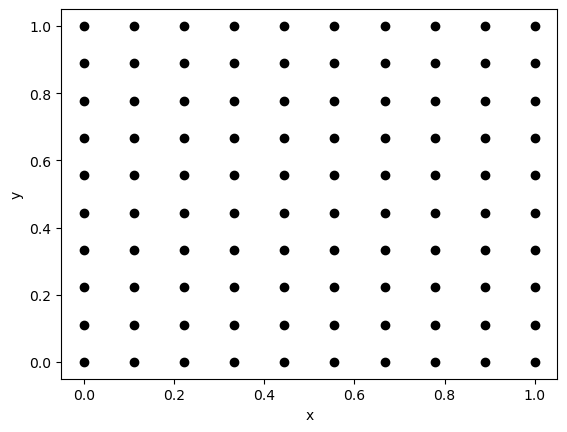

-1.580337282145907

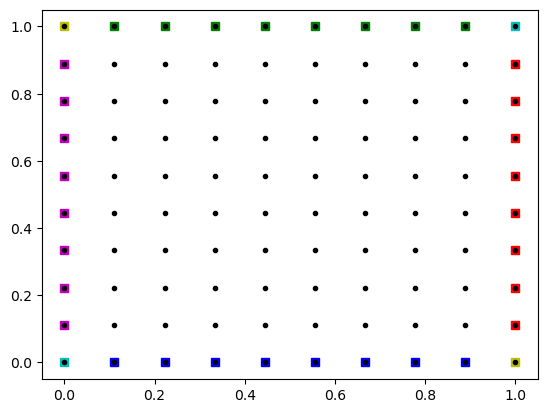

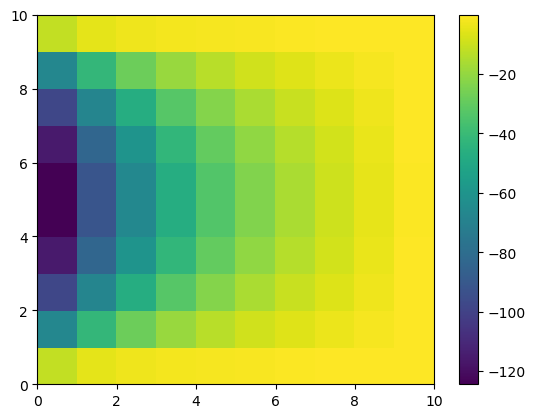

In [3]:
#Caso bi-dimensional estático
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada
L_x = 1 #m
L_y = 1 #m
k = 0.3 # (W/(m.K)), condutividade termica
s = 0 #Fonte de calor externa
h = 20 # (W/(m^2.K)), coeficiente de troca de calor
q = 100 # W/m2, fluxo de calor na fronteira esqeurda
T_inf = 0 # K, temperatura do meio

# Discretização da malha

N_x = 10 #Número de pontos na direção x
N_y = 10 #Número de pontos na direção y
x = np.linspace(0, L_x, N_x) #Geração dos pontos
y = np.linspace(0, L_y, N_y)
delta_x = x[1] - x[0] #Valor de delta x
delta_y = y[1] - y[0] #Valor de delta y
[xg, yg] = np.meshgrid(x,y) #Geração da matriz a partir dos vetores x e y
x = xg.flatten()
y = yg.flatten()

# Regiões de acordo com os índices
n_inf_l = np.array([0]) #Ponto inferior esquerdo
region_B = np.arange(1, N_x - 1, 1) # Fronteira inferior
n_inf_r = np.array([N_x - 1]) #Ponto inferior direito
n_t_r = np.array ([N_x * N_y - 1]) # Ponto superior direito
region_R = np.arange((2* N_x) - 1, (N_x * N_y) - (N_x), N_x) # Fronteira direita
n_t_l = np.array([N_x * (N_y - 1)]) #Ponto superior esquerdo
region_T = np.arange((N_x * (N_y - 1)) + 1, (N_x * N_y) - 1, 1) # Fronteira superior
region_L = np.arange(N_x , ((N_x * (N_y - 1)) - N_x) + N_x, N_x) # Fronteira esquerda

# Montagem das matrizes e dos vetores 
A = np.zeros((N_x * N_y, N_x * N_y))
b = np.zeros(N_x * N_y)

for i in range (N_x * N_y):
    if i in n_inf_l:
        A[i, i + 1] = 2 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
        A[i, i + N_x] = 2 / (delta_y ** 2)
        b[i] = -(s / k) + ((2 * q) / (delta_x * k)) - ((2 * h * T_inf) / (k * delta_y))
    elif i in n_t_l:
        A[i, i + 1] = 2 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
        A[i, i - N_x] = 2 / (delta_y ** 2)
        b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_y)) + ((2 * q) / (delta_x * k))
    elif i in n_t_r:
        A[i, i - 1] = 2 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_x * k)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
        A[i, i - N_x] = 2 / (delta_y ** 2)
        b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_x)) - ((2 * h * T_inf) / (k * delta_y))
    elif i in n_inf_r:
        A[i, i - 1] = 2 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_x * k)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
        A[i, i + N_x] = 2 / (delta_y ** 2)
        b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_x)) - ((2 * h * T_inf) / (k * delta_y))
    elif i in region_L:
        A[i, i + 1] = 2 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ( 2 / (delta_y ** 2)))
        A[i, i + N_x] = 1 / (delta_y ** 2)
        A[i, i - N_x] = 1 / (delta_y ** 2)
        b[i] = -(s / k) + ((2 * q) / (delta_x * k))
    elif i in region_R:
        A[i, i - 1] = 2 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_x * k)) + ( 2 / (delta_y ** 2)))
        A[i, i - N_x] = 1 / (delta_y ** 2)
        A[i, i + N_x] = 1 / (delta_y ** 2)
        b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_x))
    elif i in region_T:
        A[i, i - 1] = 1 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
        A[i, i + 1] = 1 / (delta_x ** 2)
        A[i, i - N_x] = 2 / (delta_y ** 2)
        b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_y))
    elif i in region_B:
        A[i, i - 1] = 1 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ((2 * h) / (delta_y * k)) + ( 2 / (delta_y ** 2)))
        A[i, i + 1] = 1 / (delta_x ** 2)
        A[i, i + N_x] = 2 / (delta_y ** 2)
        b[i] = -(s / k) - ((2 * h * T_inf) / (k * delta_y))
    else:
        A[i, i - N_x] = 1 / (delta_y ** 2)
        A[i, i - 1] = 1 / (delta_x ** 2)
        A[i, i] = -1 * ((2 / (delta_x ** 2)) + ( 2 / (delta_y ** 2)))
        A[i, i + 1] = 1 / (delta_x ** 2)
        A[i, i + N_x] = 1 / (delta_y ** 2)
        b[i] = (s / k) 

# Sistema resultante
T = np.linalg.solve(A, b)
T_matrix = T.reshape((N_y, N_x))
a = int(((N_x - 1) / 2) + 1)
valor = T_matrix[0, a]

# Plot da discretização
plt.plot(x, y, marker='o', color='k', linestyle='none')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(x[region_B], y[region_B], 'sb', label = 'B')
plt.plot(x[region_R], y[region_R], 'sr', label = 'R')
plt.plot(x[region_T], y[region_T], 'sg', label = 'T')
plt.plot(x[region_L], y[region_L], 'sm', label = 'L')
plt.plot(x[n_inf_l], y[n_inf_l], 'sc', label = 'B')
plt.plot(x[n_inf_r], y[n_inf_r], 'sy', label = 'R')
plt.plot(x[n_t_r], y[n_t_r], 'sc', label = 'T')
plt.plot(x[n_t_l], y[n_t_l], 'sy', label = 'L')

plt.plot(x, y, '.k')

# Resultado
plt.figure()
plt.pcolor(T_matrix)
plt.colorbar()
a = int((N_x - 1) / 2)
T_matrix[0, a]
 